In [24]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score

In [2]:
data1 = pd.read_csv("Credit Default.csv")
data1.sample(4)

,Income,Age,Loan,Loan to Income,Default
1395,36475.35353,63.330432,413.311163,0.011331,0
849,43205.63175,23.125877,4835.274657,0.111913,0
575,36266.21187,55.542363,3206.927665,0.088427,0
39,26578.53669,32.676044,3489.843136,0.131303,1


In [32]:
data1.isnull().sum()

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

In [28]:
data1.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [9]:
data1[data1['Default']==1].shape

(283, 5)

In [10]:
data1[data1['Default']==0].shape

(1717, 5)

In [11]:
data1.shape

(2000, 5)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [22]:
hist = data1['Default'].value_counts()
hist

Default
0    1717
1     283
Name: count, dtype: int64

In [25]:
hist.count

<bound method Series.count of Default
0    1717
1     283
Name: count, dtype: int64>

Train Test split

In [3]:
x = data1.iloc[:,0:4].values
y = data1.iloc[:,4:5].values

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1600, 4)
(400, 4)
(1600, 1)
(400, 1)


In [5]:
log = LogisticRegression()
dtc = DecisionTreeClassifier()

In [6]:
log.fit(xtrain,ytrain)


LogisticRegression()

In [7]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [8]:
ypredlog = log.predict(xtest)

In [9]:
ypreddtc = dtc.predict(xtest)

Confusion Matrix

In [10]:
conflog = confusion_matrix(ytest,ypredlog)
conflog

array([[334,  14],
       [ 11,  41]], dtype=int64)

In [11]:
confdtc = confusion_matrix(ytest,ypreddtc)
confdtc

array([[348,   0],
       [  2,  50]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix of Logistic regression'}>

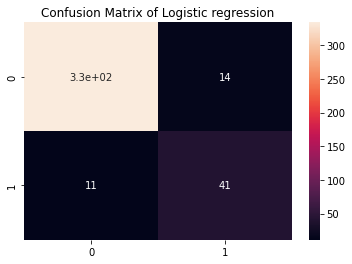

In [12]:
import seaborn as sns
plt.title("Confusion Matrix of Logistic regression")
sns.heatmap(conflog,annot=True)

<AxesSubplot:title={'center':'Confusion Matrix of Decision Tree'}>

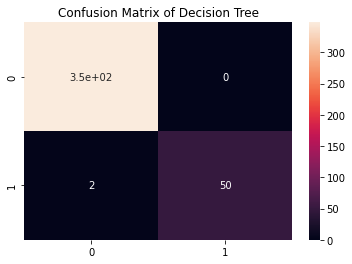

In [13]:
plt.title("Confusion Matrix of Decision Tree")
sns.heatmap(confdtc,annot=True)

Another Method

Confusion Matrix of Logistic regression


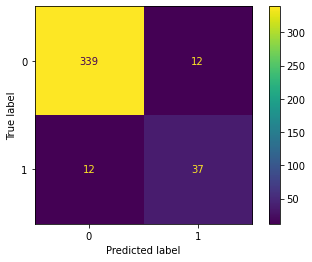

In [14]:
print("Confusion Matrix of Logistic regression")
ConfusionMatrixDisplay(conflog).plot()

Confusion Matrix of Decision Tree :-


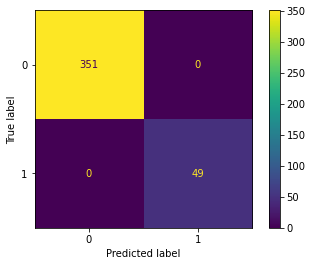

In [15]:
print("Confusion Matrix of Decision Tree :-")
ConfusionMatrixDisplay(confdtc).plot()

Precision

In [14]:
precision_score(ytest,ypreddtc)

1.0

In [15]:
precision_score(ytest,ypreddtc,average=None)

array([0.99428571, 1.        ])

In [16]:
precision_score(ytest,ypreddtc,average='weighted')

0.9950285714285715

Recall

In [17]:
recall_score(ytest,ypreddtc)

0.9615384615384616

In [18]:
recall_score(ytest,ypreddtc,average=None)

array([1.        , 0.96153846])

In [19]:
recall_score(ytest,ypreddtc,average='weighted')

0.995

F1 score

In [20]:
f1_score(ytest,ypreddtc)

0.9803921568627451

In [22]:
f1_score(ytest,ypreddtc,average=None)

array([0.99713467, 0.98039216])

In [23]:
f1_score(ytest,ypreddtc,average='weighted')

0.9949581437159393

confusion matrix report 

In [33]:
target_names = ['Income', 'Age', 'Loan', 'Loan to Income']
cr = classification_report(ytest,ypreddtc)

In [34]:
cr

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00       348\n           1       1.00      0.96      0.98        52\n\n    accuracy                           0.99       400\n   macro avg       1.00      0.98      0.99       400\nweighted avg       1.00      0.99      0.99       400\n'